<a href="https://colab.research.google.com/github/gorzanskik-ai/intro-to-ann/blob/main/01_intro/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as ex
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [5]:
X_train = X_train / 255 #standaryzacja danych wejściowych
X_test = X_test / 255

(-0.5, 27.5, 27.5, -0.5)

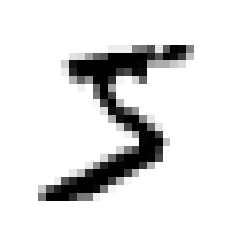

In [6]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

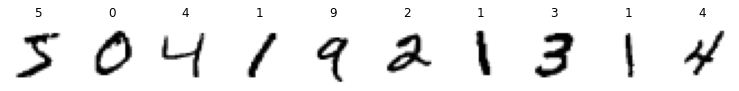

In [7]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.axis('off')
    plt.title(y_train[i-1])

In [11]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
history=model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 150us/sample - loss: 0.2943 - accuracy: 0.9154
Epoch 2/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1431 - accuracy: 0.9575
Epoch 3/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1092 - accuracy: 0.9668
Epoch 4/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0865 - accuracy: 0.9737
Epoch 5/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0751 - accuracy: 0.9767


In [13]:
model.evaluate(X_test, y_test, verbose=2) #wynik na zbiorze testowym

10000/1 - 1s - loss: 0.0397 - accuracy: 0.9774


[0.07713566967546939, 0.9774]

In [14]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy
0,0.294281,0.915367
1,0.143055,0.957500
2,0.109212,0.966817
3,0.086474,0.973667
4,0.075093,0.976733


In [15]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

In [16]:
y_pred = model.predict(X_test)
y_pred[0]

array([0.000000163102, 0.000000011935, 0.000001348801, 0.00015318682 , 0.000000000065, 0.000000035528, 0.000000000001,
       0.9998381     , 0.000000153303, 0.000007020774], dtype=float32)

In [17]:
y_pred = model.predict_classes(X_test)

In [19]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [22]:
y_values = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
y_values.head()

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [32]:
misclassified = y_values[y_values['y_test'] != y_values['y_pred']]
misclassified.head()

,y_test,y_pred
247,4,6
290,8,4
321,2,7
340,5,3
381,3,7


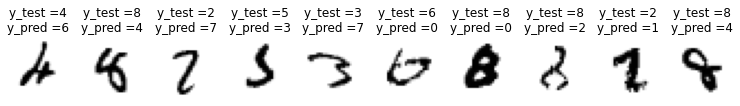

In [33]:
plt.figure(figsize=(13, 13))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title('y_test =' + str(misclassified['y_test'][j]) + '\n' + 'y_pred =' + str(misclassified['y_pred'][j]))
    plt.axis('off')

In [ ]:
y_pred[61]